In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's severaal helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
from PIL import Image
import matplotlib.pyplot as mpimg
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

'''
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
'''
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

"\nfor dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))\n"

In [2]:
df = pd.read_csv("../input/coronahack-chest-xraydataset/Chest_xray_Corona_Metadata.csv")
df.Label.unique()

array(['Normal', 'Pnemonia'], dtype=object)

In [3]:
print(f"Train num : {len(df[df['Dataset_type']=='TRAIN'])}\nTest num : {len(df[df['Dataset_type']=='TEST'])}")

Train num : 5286
Test num : 624


In [4]:
import os
import pandas as pd
import time
import shutil

PATH_TRAIN = "../input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train"
PATH_TEST = "../input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/test"

Train_Total_Imgs = len(os.listdir(PATH_TRAIN))
Test_Total_Imgs = len(os.listdir(PATH_TEST))

Train_normal = 0
Train_infected = 0
Test_normal = 0
Test_infected = 0

img = df["X_ray_image_name"]
label = df["Label"]
image_type = df["Dataset_type"]
Train_all_dir = os.listdir(PATH_TRAIN)
Test_all_dir = os.listdir(PATH_TEST)

os.mkdir("train")
os.mkdir('train/Infected')
os.mkdir("train/Normal")
os.mkdir("test")
os.mkdir('test/Infected')
os.mkdir("test/Normal")

Train_wrong_info = 0  # Checking if the provided list maps the images correctly
Test_wrong_info = 0  # Checking if the provided list maps the images correctly

# Moving the train images to designated folders

for idx in range(len(image_type)):
    if image_type[idx] == "TRAIN":
        if img[idx] in Train_all_dir: # Make sure that all images in Chest_xray_Corona_Metadata.csv is mapped
            if label[idx] == "Normal":
                shutil.copy(
                    PATH_TRAIN + "/" + img[idx], "train/Normal/" + img[idx]
                )
                Train_normal += 1

            else:

                shutil.copy(
                    PATH_TRAIN + "/" + img[idx], "train/Infected/" + img[idx]
                )
                Train_infected += 1

        else:
            Train_wrong_info += 1
    else:
        if img[idx] in Test_all_dir: # Make sure that all images in Chest_xray_Corona_Metadata.csv is mapped
            if label[idx] == "Normal":
                shutil.copy(
                    PATH_TEST + "/" + img[idx], "test/Normal/" + img[idx]
                )
                Test_normal += 1

            else:

                shutil.copy(
                    PATH_TEST + "/" + img[idx], "test/Infected/" + img[idx]
                )
                Test_infected += 1

        else:
            Test_wrong_info += 1

print(f"(TRAIN DATASET) X-ray of Normal patients: {Train_normal} \n(TRAIN DATASET) X-ray of Infected patients : {Train_infected} \n(TRAIN DATASET) : {Train_normal+Train_infected} wrong_info : {Train_wrong_info}")
print(f"(TEST DATASET) X-ray of Normal patients: {Test_normal} \n(TEST DATASET) X-ray of Infected patients : {Test_infected} \n(TEST DATASET) : {Test_normal+Test_infected} wrong_info : {Test_wrong_info}")

(TRAIN DATASET) X-ray of Normal patients: 1342 
(TRAIN DATASET) X-ray of Infected patients : 3944 
(TRAIN DATASET) : 5286 wrong_info : 0
(TEST DATASET) X-ray of Normal patients: 234 
(TEST DATASET) X-ray of Infected patients : 390 
(TEST DATASET) : 624 wrong_info : 0


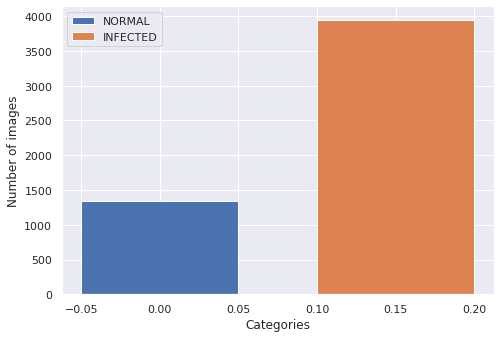

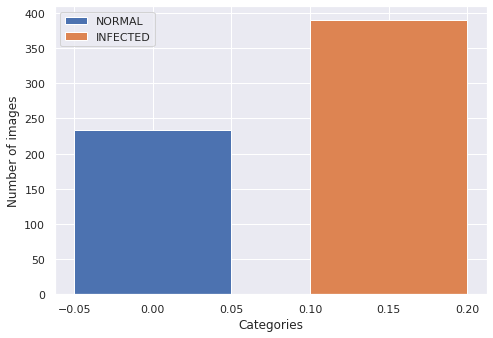

In [5]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
categories = ["NORMAL", "INFECTED"]
number_of_imgs = [Train_normal, Train_infected]
ax.bar(0, number_of_imgs[0], width=0.1)
ax.bar(0.15, number_of_imgs[1], width=0.1)
ax.legend(labels=categories)
ax.set_ylabel("Number of images")
ax.set_xlabel("Categories")
plt.show()

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
categories = ["NORMAL", "INFECTED"]
number_of_imgs = [Test_normal, Test_infected]
ax.bar(0, number_of_imgs[0], width=0.1)
ax.bar(0.15, number_of_imgs[1], width=0.1)
ax.legend(labels=categories)
ax.set_ylabel("Number of images")
ax.set_xlabel("Categories")
plt.show()

In [6]:
def list_files(startpath):
    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print('{}{}/'.format(indent, os.path.basename(root)))
        subindent = ' ' * 4 * (level + 1)
        n = 0
        for f in files:
            n = n+1
            if n>5:
                print('{}{}'.format(subindent, f),end = "  ...... \n")
                break
            print('{}{}'.format(subindent, f))

print("Input : ")
list_files("../input/coronahack-chest-xraydataset")
print("\nOutput : ")
list_files("./")

Input : 
coronahack-chest-xraydataset/
    Chest_xray_Corona_dataset_Summary.csv
    Chest_xray_Corona_Metadata.csv
    Coronahack-Chest-XRay-Dataset/
        Coronahack-Chest-XRay-Dataset/
            test/
                person1676_virus_2892.jpeg
                NORMAL2-IM-0336-0001.jpeg
                person1650_virus_2852.jpeg
                person22_virus_55.jpeg
                IM-0101-0001.jpeg
                person122_bacteria_582.jpeg  ...... 
            train/
                person1180_virus_2010.jpeg
                person1230_virus_2081.jpeg
                person1513_virus_2632.jpeg
                NORMAL2-IM-0771-0001.jpeg
                person124_virus_238.jpeg
                person746_virus_1369.jpeg  ...... 

Output : 
/
    __notebook_source__.ipynb
test/
    Normal/
        IM-0033-0001-0002.jpeg
        NORMAL2-IM-0241-0001.jpeg
        NORMAL2-IM-0378-0001.jpeg
        NORMAL2-IM-0310-0001.jpeg
        NORMAL2-IM-0072-0001.jpeg
        NORMAL2-IM-0173-0001

### **Exploring train dataset**
Whenever you see an area of increased density within the lung, it must be the result of one of these four patterns.

1. **Consolidation** - any pathologic process that fills the alveoli with fluid, pus, blood, cells (including tumor cells) or other substances resulting in lobar, diffuse or multifocal ill-defined opacities.

2. **Interstitial** - involvement of the supporting tissue of the lung parenchyma resulting in fine or coarse reticular opacities or small nodules.

3. **Nodule or mass** - any space occupying lesion either solitary or multiple.

4. **Atelectasis** - collapse of a part of the lung due to a decrease in the amount of air in the alveoli resulting in volume loss and increased density.

![Pneumonia image](https://www.mayoclinic.org/-/media/kcms/gbs/patient-consumer/images/2013/08/26/10/01/ds00135_im00621_pnuesmal_gif.png)

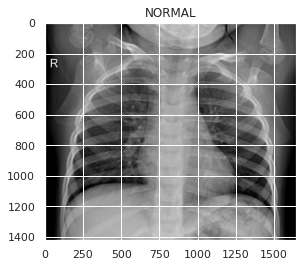

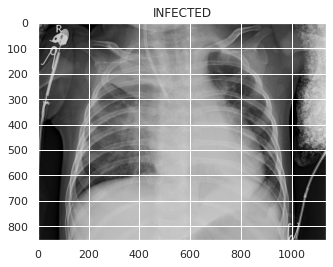

In [7]:
import cv2

normal_sample = cv2.imread("train/Normal/"+os.listdir("train/Normal")[0])
infected_sample = cv2.imread("train/Infected/"+os.listdir("train/Infected")[0])

plt.imshow(normal_sample)
plt.title("NORMAL")
plt.show()

plt.imshow(infected_sample)
plt.title("INFECTED")
plt.show()

**The difference can be seen with different visualizations below**

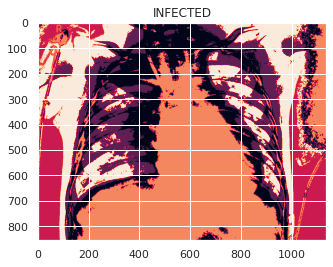

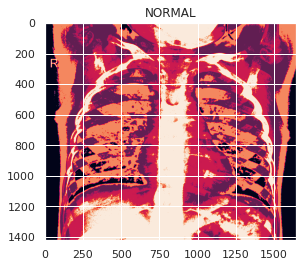

In [8]:
from sklearn import cluster
import numpy as np

kmeans = cluster.KMeans(5)
dims = np.shape(infected_sample)
pixel_matrix = np.reshape(infected_sample, (dims[0] * dims[1], dims[2]))
clustered = kmeans.fit_predict(pixel_matrix)


clustered_img = np.reshape(clustered, (dims[0], dims[1]))
plt.imshow(clustered_img)
plt.title("INFECTED")
plt.show()

kmeans = cluster.KMeans(5)
dims = np.shape(normal_sample)
pixel_matrix = np.reshape(normal_sample, (dims[0] * dims[1], dims[2]))
clustered = kmeans.fit_predict(pixel_matrix)


clustered_img = np.reshape(clustered, (dims[0], dims[1]))
plt.imshow(clustered_img)
plt.title("NORMAL")
plt.show()

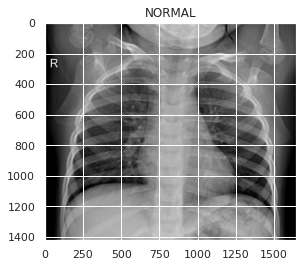

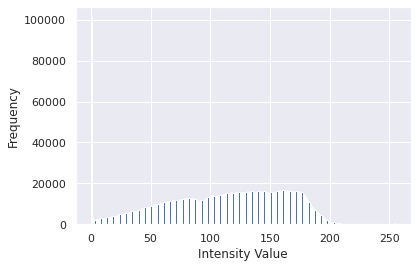

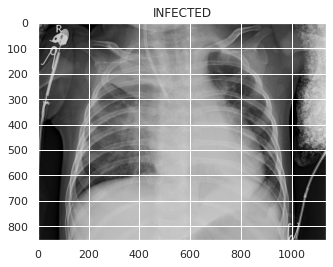

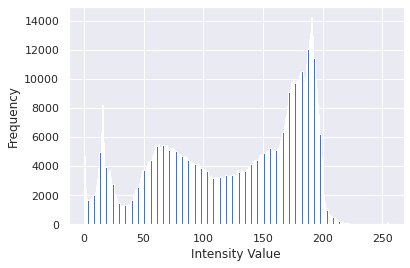

In [9]:
from skimage import io
import matplotlib.pyplot as plt

plt.imshow(normal_sample)
plt.title("NORMAL")
plt.show()

image = io.imread("train/Normal/"+os.listdir("train/Normal")[0])
ax = plt.hist(image.ravel(), bins = 256)
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')
plt.show()

plt.imshow(infected_sample)
plt.title("INFECTED")
plt.show()

image = io.imread("train/Infected/"+os.listdir("train/Infected")[0])
ax = plt.hist(image.ravel(), bins = 256)
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')
plt.show()

### Initializing the data loader

vgg16 pre-trained models expect input images normalized in the same way, i.e. mini-batches of 3-channel RGB images of shape (3 x H x W), where H and W are expected to be at least 224.

The images have to be loaded in to a range of [0, 1] and then normalized using:

**mean = [0.485, 0.456, 0.406] and std = [0.229, 0.224, 0.225]**
We are applying augmentation like random rotation , horizontal and vertical flips to make sure the model doesn't overfit or learn the wrong features.

Another tranforms such as crop, sheer are not proper this dataset. (~XAI)

In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import os
import time
import torchvision
from PIL import ImageFile
import matplotlib.pyplot as plt
import cv2

In [11]:
ImageFile.LOAD_TRUNCATED_IMAGES = True # To prevent error during loading broken images

PATH_TRAIN = "train"
PATH_TEST  = "test"
EPOCHS = 10
BATCH_SIZE = 32
TOTAL_SIZE = len(os.listdir(PATH_TRAIN + "/Normal")) + len(
    os.listdir(PATH_TRAIN + "/Infected")
)
TOTAL_TEST_SIZE = len(os.listdir(PATH_TEST + "/Normal")) + len(
    os.listdir(PATH_TEST + "/Infected")
)
STEPS_PER_EPOCH = TOTAL_SIZE // BATCH_SIZE
STEPS_PER_TEST_EPOCH = TOTAL_TEST_SIZE // BATCH_SIZE
IMAGE_H, IMAGE_W = 224, 224

In [12]:
transform = torchvision.transforms.Compose(
    [  # Applying Augmentation
        torchvision.transforms.Resize((IMAGE_H, IMAGE_W)),
        torchvision.transforms.RandomHorizontalFlip(p=0.5),
        torchvision.transforms.RandomVerticalFlip(p=0.5),
        torchvision.transforms.RandomRotation(30),
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize(
            mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]
        ),
    ]
)  # Normalizing data

# Intitalizing the train data loader and applying the transformations

train_dataset = torchvision.datasets.ImageFolder(root=PATH_TRAIN, transform=transform)

train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=BATCH_SIZE, num_workers=1, shuffle=True
)

# Intitalizing the test data loader

test_dataset = torchvision.datasets.ImageFolder(
    root=PATH_TEST, transform=transform
)

test_loader = torch.utils.data.DataLoader(
    test_dataset, batch_size=BATCH_SIZE, num_workers=1, shuffle=True
)

### Initializing pretrained resnet18 model

![ResNet Contribution](https://d2l.ai/_images/residual-block.svg)

ResNet, short for Residual Networks is a classic neural network used as a backbone for many computer vision tasks. This model was the winner of ImageNet challenge in 2015. The fundamental breakthrough with ResNet was it allowed us to train extremely deep neural networks with 150+layers successfully. Prior to ResNet training very deep neural networks was difficult due to the problem of vanishing gradients. However, increasing network depth does not work by simply stacking layers together. Deep networks are hard to train because of the notorious vanishing gradient problem — as the gradient is back-propagated to earlier layers, repeated multiplication may make the gradient extremely small. As a result, as the network goes deeper, its performance gets saturated or even starts degrading rapidly.

### Load ResNet18 (No pretrained)

In [13]:
model = torchvision.models.resnet18(False)  # Initializing resnet18
feature = model.fc.in_features # Getting last layer's output features
model.fc = nn.Linear(feature, 2) # Modifying the last layer accordng to our need

### Initializing optimizers and loss function 

We will also specify the learning rate of the optimiser, here in this case it is set at 0.0001. If our training is bouncing a lot on epochs then we need to decrease the learning rate so that we can reach global minima.

In [14]:
# Fix random seed
import torch
import random
import torch.backends.cudnn as cudnn
import numpy as np
from tqdm import tqdm

torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.cuda.manual_seed_all(0)
np.random.seed(0)
cudnn.benchmark = False
cudnn.deterministic = True
random.seed(0)

In [15]:
#  Returns a bool indicating if CUDA is currently available.
print(f"CUDA avaliable : {torch.cuda.is_available()}")
 
#  Returns the index of a currently selected device.
print(f"CUDA device num : {torch.cuda.current_device()}")
 
#  Returns the number of GPUs available.
print(f"Entire CUDA nums : {torch.cuda.device_count()}")
 
#  Gets the name of a device.
print(f"Device name : {torch.cuda.get_device_name(0)}")
 
#  Context-manager that changes the selected device.
#  Device (torch.device or int) – device index to select. 
print(torch.cuda.device(0))

CUDA avaliable : True
CUDA device num : 0
Entire CUDA nums : 1
Device name : Tesla P100-PCIE-16GB


In [16]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)  # Sending model to device
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(
    model.parameters(), lr=1e-4
)  # lr should be kept low so that the pre-trained weights don't change easily

AdamW is an optimization algorithm that can be used instead of the classical stochastic gradient descent procedure to update network weights iterative based in training data.

The authors describe AdamW as combining the advantages of two other extensions of stochastic gradient descent. Specifically:

1. Adaptive Gradient Algorithm (AdaGrad) that maintains a per-parameter learning rate that improves performance on problems with sparse gradients (e.g. natural language and computer vision problems).
2. Root Mean Square Propagation (RMSProp) that also maintains per-parameter learning rates that are adapted based on the average of recent magnitudes of the gradients for the weight (e.g. how quickly it is changing). This means the algorithm does well on online and non-stationary problems (e.g. noisy).

## Training the model

In [17]:
def get_test():
    test_loss = []

    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

    for batch_idx, (data, label) in enumerate(test_loader):
        if batch_idx == STEPS_PER_TEST_EPOCH:
            break

        # Model is used to predict the test data so we are switching off the gradient

        with torch.no_grad():
            test_correct = 0
            test_len = 0
            
            data = data.to(device)
            label = label.long().to(device)
            output = model(data)
            criterion = nn.CrossEntropyLoss()
            loss = criterion(output, label)

            # Note that optimizer is not used because the model shouldn't learn the test dataset
            pred = torch.argmax(F.softmax(output, dim=1),dim=1)
            correct = pred.eq(label)
            
            test_len += len(label)
            test_correct += correct.sum().item()

        test_loss.append(float(loss.detach().cpu()))
    print("CORRECT: " + str(test_correct), "INCORRECT: " + str(test_len - test_correct),"TEST ACCURACY: "+str(test_correct/test_len))
    return (
            test_correct/test_len,
            sum(test_loss)/len(test_loss),
    )

In [18]:
avg_test_loss_history = []
avg_test_accuracy_history = []
avg_train_loss_history = []
avg_train_accuracy_history = []

loss_history = []
accuracy_history = []

new_best = 0

for epoch in tqdm(range(EPOCHS)):

    print(f'======== Epoch {epoch+1} / {EPOCHS} ========')

    for batch_idx, (data, label) in enumerate(train_loader):
        if batch_idx == STEPS_PER_EPOCH:
            break
        optimizer.zero_grad()  # Resetting gradients after each optimizations
        
        train_len = 0
        train_correct = 0
        
        # Sending input , label to device
        data = data.to(device) 
        label = label.to(device)
        output = model(data)
        loss = criterion(output, label.reshape((BATCH_SIZE,)).long())
        loss_history.append(loss.detach().cpu())
        
        # The loss variable has gradient attached to it so we are removing it so that it can be used to plot graphs
        loss.backward()
        optimizer.step()  # Optimizing the model

        # Checking train accuracy
        
        pred = torch.argmax(F.softmax(output, dim=1),dim=1)
        correct = pred.eq(label)

        train_len += len(label)
        train_correct += correct.sum().item()
        

        print(
            "\r Epoch "
            + str(epoch)
            + " Minibatch: "
            + str(batch_idx)
            + "/"
            + str(STEPS_PER_EPOCH)
            + " Loss: "
            + str(loss_history[-1]),
            end = ""
            
        )
        
        accuracy_history.append(train_correct/train_len)

    print(
        " \n Epoch "
        + str(epoch)
        + " Loss "
        + str(sum(loss_history[-STEPS_PER_EPOCH:]) / STEPS_PER_EPOCH)
        + " \n Max Loss: "
        + str(max(loss_history[-STEPS_PER_EPOCH:]))
        + " Min Loss: "
        + str(min(loss_history[-STEPS_PER_EPOCH:]))
        + " Train Accuracy: "
        + str(int(sum(accuracy_history[-STEPS_PER_EPOCH:]) / STEPS_PER_EPOCH * 100))
    )
    
    avg_train_loss_history.append(sum(loss_history[-STEPS_PER_EPOCH:]) / STEPS_PER_EPOCH)
    avg_train_accuracy_history.append(sum(accuracy_history[-STEPS_PER_EPOCH:]) / STEPS_PER_EPOCH)
    
    test_acc , test_loss  = get_test()
    print("ACCURACY : "+str(test_acc),"LOSS : "+str(test_loss))
    
    avg_test_accuracy_history.append(test_acc)
    avg_train_loss_history.append(test_loss)
    
    if test_acc>new_best: 
        new_best = test_acc
        torch.save(model.state_dict(), "./model.pth") # Saving our best model

  0%|          | 0/10 [00:00<?, ?it/s]

======== Epoch 1 / 10 ========
 Epoch 0 Minibatch: 164/165 Loss: tensor(0.1604) 
 Epoch 0 Loss tensor(0.2532) 
 Max Loss: tensor(0.8444) Min Loss: tensor(0.0312) Train Accuracy: 89


 10%|█         | 1/10 [02:01<18:17, 121.91s/it]

CORRECT: 20 INCORRECT: 12 TEST ACCURACY: 0.625
ACCURACY : 0.625 LOSS : 0.5229136504625019
======== Epoch 2 / 10 ========
 Epoch 1 Minibatch: 164/165 Loss: tensor(0.0662) 
 Epoch 1 Loss tensor(0.1562) 
 Max Loss: tensor(0.4366) Min Loss: tensor(0.0244) Train Accuracy: 93


 20%|██        | 2/10 [03:58<15:48, 118.59s/it]

CORRECT: 25 INCORRECT: 7 TEST ACCURACY: 0.78125
ACCURACY : 0.78125 LOSS : 0.473784371426231
======== Epoch 3 / 10 ========
 Epoch 2 Minibatch: 164/165 Loss: tensor(0.0363) 
 Epoch 2 Loss tensor(0.1267) 
 Max Loss: tensor(0.4580) Min Loss: tensor(0.0204) Train Accuracy: 94


 30%|███       | 3/10 [05:54<13:42, 117.56s/it]

CORRECT: 28 INCORRECT: 4 TEST ACCURACY: 0.875
ACCURACY : 0.875 LOSS : 0.5301323172293211
======== Epoch 4 / 10 ========
 Epoch 3 Minibatch: 164/165 Loss: tensor(0.0486) 
 Epoch 3 Loss tensor(0.1196) 
 Max Loss: tensor(0.4569) Min Loss: tensor(0.0151) Train Accuracy: 95
CORRECT: 29 INCORRECT: 3 TEST ACCURACY: 0.90625
ACCURACY : 0.90625 LOSS : 0.5400856027477666


 40%|████      | 4/10 [07:50<11:41, 116.86s/it]

======== Epoch 5 / 10 ========
 Epoch 4 Minibatch: 164/165 Loss: tensor(0.1048) 
 Epoch 4 Loss tensor(0.1117) 
 Max Loss: tensor(0.4890) Min Loss: tensor(0.0129) Train Accuracy: 96


 50%|█████     | 5/10 [09:48<09:46, 117.36s/it]

CORRECT: 28 INCORRECT: 4 TEST ACCURACY: 0.875
ACCURACY : 0.875 LOSS : 0.5696425775164052
======== Epoch 6 / 10 ========
 Epoch 5 Minibatch: 164/165 Loss: tensor(0.0748) 
 Epoch 5 Loss tensor(0.1118) 
 Max Loss: tensor(0.4126) Min Loss: tensor(0.0104) Train Accuracy: 95


 60%|██████    | 6/10 [11:43<07:46, 116.62s/it]

CORRECT: 29 INCORRECT: 3 TEST ACCURACY: 0.90625
ACCURACY : 0.90625 LOSS : 0.6312893848670157
======== Epoch 7 / 10 ========
 Epoch 6 Minibatch: 164/165 Loss: tensor(0.1358) 
 Epoch 6 Loss tensor(0.0927) 
 Max Loss: tensor(0.4199) Min Loss: tensor(0.0054) Train Accuracy: 96


 70%|███████   | 7/10 [13:38<05:48, 116.13s/it]

CORRECT: 26 INCORRECT: 6 TEST ACCURACY: 0.8125
ACCURACY : 0.8125 LOSS : 0.6988636788568998
======== Epoch 8 / 10 ========
 Epoch 7 Minibatch: 164/165 Loss: tensor(0.1267) 
 Epoch 7 Loss tensor(0.0990) 
 Max Loss: tensor(0.3698) Min Loss: tensor(0.0072) Train Accuracy: 95


 80%|████████  | 8/10 [15:34<03:51, 115.87s/it]

CORRECT: 30 INCORRECT: 2 TEST ACCURACY: 0.9375
ACCURACY : 0.9375 LOSS : 0.4641549422552711
======== Epoch 9 / 10 ========
 Epoch 8 Minibatch: 164/165 Loss: tensor(0.0251) 
 Epoch 8 Loss tensor(0.0900) 
 Max Loss: tensor(0.3540) Min Loss: tensor(0.0044) Train Accuracy: 96


 90%|█████████ | 9/10 [17:28<01:55, 115.46s/it]

CORRECT: 27 INCORRECT: 5 TEST ACCURACY: 0.84375
ACCURACY : 0.84375 LOSS : 0.6101099786005522
======== Epoch 10 / 10 ========
 Epoch 9 Minibatch: 164/165 Loss: tensor(0.0561) 
 Epoch 9 Loss tensor(0.0875) 
 Max Loss: tensor(0.4965) Min Loss: tensor(0.0054) Train Accuracy: 96


100%|██████████| 10/10 [19:24<00:00, 116.40s/it]

CORRECT: 29 INCORRECT: 3 TEST ACCURACY: 0.90625
ACCURACY : 0.90625 LOSS : 0.5417027734220028


In [19]:
print("Best Accuracy : ",new_best)

Best Accuracy :  0.9375


## Loss during training

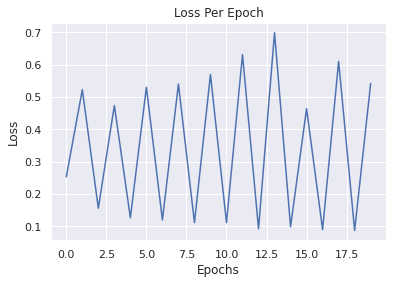

In [21]:
plt.plot(avg_train_loss_history ,label = "Train")
plt.plot(avg_test_loss_history , label = "Test")
plt.title('Loss Per Epoch')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.savefig('full_result.png')
plt.show()

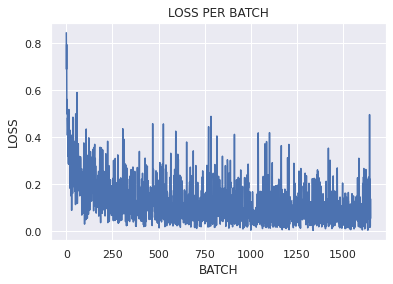

In [22]:
plt.plot(loss_history)
plt.title('LOSS PER BATCH')
plt.xlabel("BATCH")
plt.ylabel("LOSS")
plt.savefig('batch_result.png')
plt.show()

## Accuracy during training

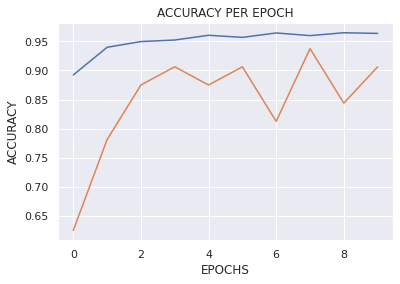

In [23]:
plt.plot(avg_train_accuracy_history , label = "Train")
plt.plot(avg_test_accuracy_history , label = "Test")
plt.title('ACCURACY PER EPOCH')
plt.xlabel("EPOCHS")
plt.ylabel("ACCURACY")
plt.savefig('result.png')
plt.show()

This model was able to produce about 90 to 95% accuracy in different runs. This inconsistent result is due to model's random weight and bias initialization.Code to run in Google colab can be found here.You can also checkout tuning of pre-trained vgg16 model with pneumonia dataset here

# CAM (Class Activation Map)

## Sample normal, pneumonia data
Normal = (image, label=0) \
Peunmonia = (image, label=1)

In [126]:
# Normal
Normal = test_dataset[0]

# Penumonia
Pneumonia = test_dataset[-1]


## Hook function
To get features from before fc layer.

In [24]:
class Hook():
    def __init__(self, module):
        self.hook = module.register_forward_hook(self.hook_fn)
    def hook_fn(self, module, input, output):
        self.input = input
        self.output = output
    def close(self):
        self.hook.remove()

In [25]:
hook = [Hook(layer[1]) for layer in list(model._modules.items())]

In [130]:
model.eval()

class_weight_0 = model.fc.weight[int(0)].unsqueeze(-1).unsqueeze(-1)
class_weight_1 = model.fc.weight[int(1)].unsqueeze(-1).unsqueeze(-1)

# predict Normal
n_output = model(Normal[0].unsqueeze(0).cuda())
n_feature = hook[8].input[0][0]

# calculate CAM
n_cam_0 = n_feature * class_weight_0
n_cam0 = torch.sum(n_cam_0, axis=0)
n_cam0 = n_cam0.detach().cpu().numpy()

n_cam_1 = n_feature * class_weight_1
n_cam1 = torch.sum(n_cam_1, axis=0)
n_cam1 = n_cam1.detach().cpu().numpy()

# predict Pneumonia
p_output = model(Pneumonia[0].unsqueeze(0).cuda())
p_feature = hook[8].input[0][0]

# calculate CAM
p_cam_0 = p_feature * class_weight_0
p_cam0 = torch.sum(p_cam_0, axis=0)
p_cam0 = p_cam0.detach().cpu().numpy()

p_cam_1 = p_feature * class_weight_1
p_cam1 = torch.sum(p_cam_1, axis=0)
p_cam1 = p_cam1.detach().cpu().numpy()

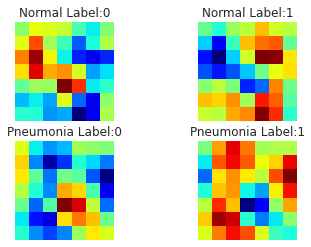

In [144]:
fig = plt.figure()

rows = 2
cols = 2

ax1 = fig.add_subplot(rows, cols, 1)
ax1.imshow(n_cam0,cmap='jet',interpolation='nearest')
ax1.axis(False)
ax1.set_title('Normal Label:0')

ax2 = fig.add_subplot(rows, cols, 2)
ax2.imshow(n_cam1,cmap='jet',interpolation='nearest')
ax2.axis(False)
ax2.set_title('Normal Label:1')

ax3 = fig.add_subplot(rows, cols, 3)
ax3.imshow(p_cam0,cmap='jet',interpolation='nearest')
ax3.axis(False)
ax3.set_title('Pneumonia Label:0')

ax4 = fig.add_subplot(rows, cols, 4)
ax4.imshow(p_cam1,cmap='jet',interpolation='nearest')
ax4.axis(False)
ax4.set_title('Pneumonia Label:1')

plt.show()

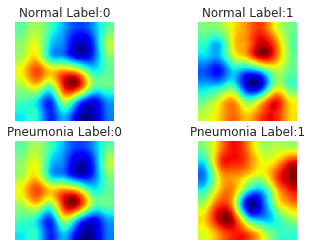

In [146]:
fig = plt.figure()

rows = 2
cols = 2

ax1 = fig.add_subplot(rows, cols, 1)
final_n_cam0 = cv2.resize(n_cam0,dsize=(224,224),interpolation=cv2.INTER_CUBIC)
ax1.imshow(final_cam0,cmap='jet',interpolation='nearest')
ax1.axis(False)
ax1.set_title('Normal Label:0')

ax2 = fig.add_subplot(rows, cols, 2)
final_n_cam1 = cv2.resize(n_cam1,dsize=(224,224),interpolation=cv2.INTER_CUBIC)
ax2.imshow(final_cam1,cmap='jet',interpolation='nearest')
ax2.axis(False)
ax2.set_title('Normal Label:1')

ax3 = fig.add_subplot(rows, cols, 3)
final_p_cam0 = cv2.resize(p_cam0,dsize=(224,224),interpolation=cv2.INTER_CUBIC)
ax3.imshow(final_cam0,cmap='jet',interpolation='nearest')
ax3.axis(False)
ax3.set_title('Pneumonia Label:0')

ax4 = fig.add_subplot(rows, cols, 4)
final_p_cam1 = cv2.resize(p_cam1,dsize=(224,224),interpolation=cv2.INTER_CUBIC)
ax4.imshow(final_p_cam1,cmap='jet',interpolation='nearest')
ax4.axis(False)
ax4.set_title('Pneumonia Label:1')

plt.show()

In [35]:
# Check image shape
origin = test_dataset[0][0].detach().numpy()
origin.shape

(3, 224, 224)

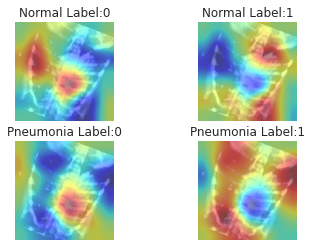

In [149]:
fig = plt.figure()

rows = 2
cols = 2

ax1 = fig.add_subplot(rows, cols, 1)
ax1.imshow(np.rollaxis(Normal[0].detach().numpy(),0,3),alpha=0.5, cmap='gray')
ax1.imshow(final_n_cam0,alpha=0.5,cmap='jet')
ax1.axis(False)
ax1.set_title('Normal Label:0')

ax2 = fig.add_subplot(rows, cols, 2)
ax2.imshow(np.rollaxis(Normal[0].detach().numpy(),0,3),alpha=0.5, cmap='gray')
ax2.imshow(final_n_cam1,alpha=0.5,cmap='jet')
ax2.axis(False)
ax2.set_title('Normal Label:1')

ax3 = fig.add_subplot(rows, cols, 3)
ax3.imshow(np.rollaxis(Normal[0].detach().numpy(),0,3),alpha=0.5, cmap='gray')
ax3.imshow(final_p_cam0,alpha=0.5,cmap='jet')
ax3.axis(False)
ax3.set_title('Pneumonia Label:0')

ax4 = fig.add_subplot(rows, cols, 4)
ax4.imshow(np.rollaxis(Normal[0].detach().numpy(),0,3),alpha=0.5, cmap='gray')
ax4.imshow(final_p_cam1,alpha=0.5,cmap='jet')
ax4.axis(False)
ax4.set_title('Pneumonia Label:1')

plt.show()

Something strange in Normal Label:1

Explaination of image is vague that it is a Pneumonia.

This is why we need to study about XAI